# GINI coeficient

Metric used to evaluate the quality of classification algorithms.

In [3]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF
np.random.seed(10)

## Content

1. [Basic GINI definition](#basic_gini_header);
2. [$GINI$ as formula](#gini_as_formula);
3. [$GINI$ & $AUC_{roc}$ relation](#gini_relation_with_roc_header).

## Basic GINI definition
<a id="basic_gini_header"></a>


Today, GINI is usually expressed through the ROC AUC, but in fact GINI originally had a separate definition through <a href="https://fedorkobak.github.io/knowledge/machine_learning/metrics/CAP.html">CAP curve</a>.

GINI for some model, is the ratio of the areas between the CAP curve of the model and the random CAP curve to the area between the ideal CAP and the random CAP.

### Graphical representation of GINI

In [4]:
plot_ss = 10000

np.random.seed(3)
random_range = np.random.rand(plot_ss)

plot_data = pd.DataFrame({
    "p_hat" : random_range,
    "y" : map(
        lambda r_val: np.random.choice(
            [0, 1], p = [1 - r_val, r_val]
        ), 
        random_range
    )
})

plot_data.sort_values("y",inplace = True, ascending = False)
plot_data["p_hat_ideal"] = np.linspace(1,0, plot_data.shape[0])


fpr, or_tpr, t = roc_curve(
    plot_data["y"], plot_data["p_hat"],
    drop_intermediate = False
)
fpr, id_tpr, t = roc_curve(
    plot_data["y"], plot_data["p_hat_ideal"],
    drop_intermediate = False
)

CAP_x = np.arange(len(or_tpr))/len(or_tpr)

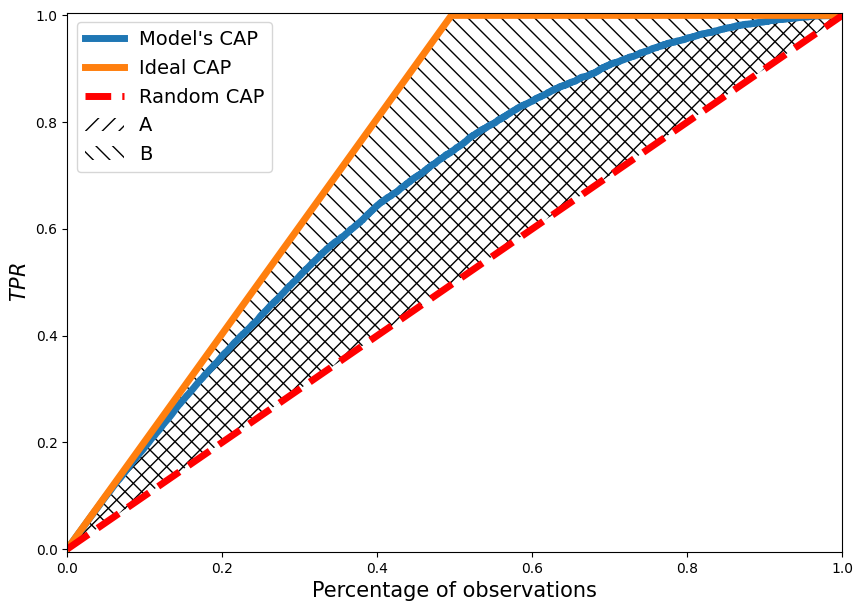

In [8]:
plt.figure(figsize = [10,7])
plt.plot(CAP_x, or_tpr, linewidth = 5)
plt.plot(CAP_x, id_tpr, linewidth = 5)
plt.plot(
    [0,1], [0,1], color = "red", 
    linestyle = "dashed",
    linewidth = 5
)

plt.fill_between(
    np.arange(len(or_tpr))/len(or_tpr),
    or_tpr,
    np.arange(len(or_tpr))/len(or_tpr),
    hatch = "//",
    alpha = 0
)
plt.fill_between(
    np.arange(len(or_tpr))/len(or_tpr),
    id_tpr,
    np.arange(len(or_tpr))/len(or_tpr),
    hatch = "\\\\",
    alpha = 0
)

plt.xlabel("Percentage of observations", fontsize = 15)
plt.ylabel("$TPR$", fontsize = 15)

plt.xlim([0,1])
plt.ylim([-0.005,1.005])

plt.legend(
    [
        "Model's CAP", "Ideal CAP", 
        "Random CAP", "A", "B"
    ],
    fontsize = 14
)
plt.show()

Following the notations of the areas in the figure, we obtain:

$$GINI = \frac{A}{B}$$

**Or by using the alternative designation of areas (for reasons not yet known, especially popular)**

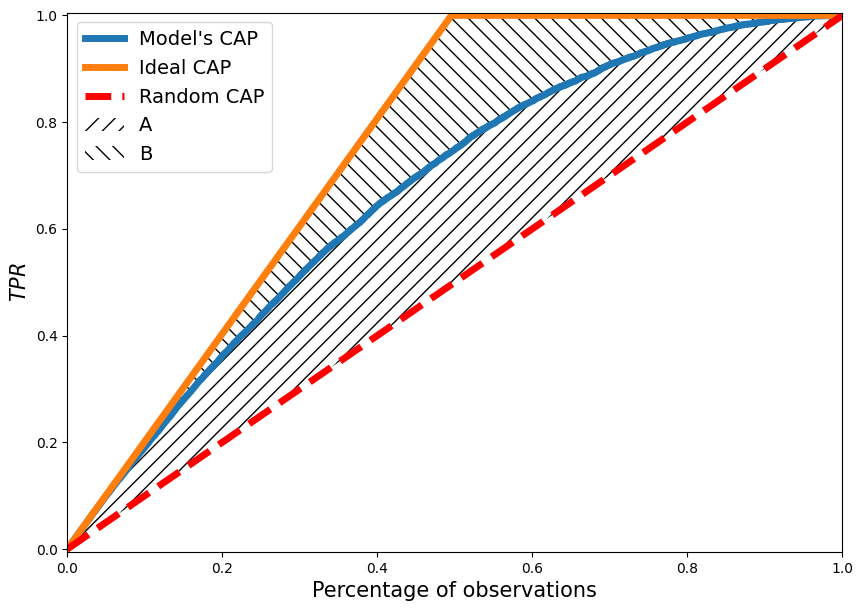

In [9]:
plt.figure(figsize = [10,7])
plt.plot(CAP_x, or_tpr, linewidth = 5)
plt.plot(CAP_x, id_tpr, linewidth = 5)
plt.plot(
    [0,1], [0,1], color = "red", 
    linestyle = "dashed",
    linewidth = 5
)

plt.fill_between(
    np.arange(len(or_tpr))/len(or_tpr),
    or_tpr,
    np.arange(len(or_tpr))/len(or_tpr),
    hatch = "//",
    alpha = 0
)
plt.fill_between(
    np.arange(len(or_tpr))/len(or_tpr),
    id_tpr,
    or_tpr,
    hatch = "\\\\",
    alpha = 0
)

plt.xlabel("Percentage of observations", fontsize = 15)
plt.ylabel("$TPR$", fontsize = 15)

plt.xlim([0,1])
plt.ylim([-0.005,1.005])

plt.legend(
    [
        "Model's CAP", "Ideal CAP", 
        "Random CAP", "A", "B"
    ],
    fontsize = 14
)
plt.show()


$$GINI = \frac{A}{B+A}$$

## $GINI$ as formula
<a id="gini_as_formula"></a>

We have already given a geometric definition of $GINI$, but for software implementation of computations or for rigorous proofs we would rather use the analytical notation of this quantity.

### Area under model $CUP$

First, let's deal with the numerator of the GINI. We need to express the area under the CUP curve, which we denote by $AUC_{cap}$.

Let for some set of objects numbered $i \in \overline{1,n}$ we have obtained some variable $p_i$ which is the greater the higher the probability of occurrence of the predicted feature $y_i$. Let objects have been sorted in descending order, so $p_i \geq p_{i+1}, i \in \overline{1,n-1}$. For example, it might look like the table below.

|$i$| $p_i$  | $y_i$ |$i/n$|$TPR_i$|$FPR_i$|
|---| ------------ | --------|-------|---------|---------|
| 1 |     0.8      |    1    |  0.2  |   1/3   |    0    |    
| 2 |     0.7      |    1    |  0.4  |   2/3   |    0    |
| 3 |     0.6      |    0    |  0.6  |   2/3   |   1/2   |
| 4 |     0.4      |    0    |  0.8  |   2/3   |    1    |
| 5 |     0.2      |    1    |   1   |    1    |    1    |

The area under an arbitrary curve $AUC$ which is the set of points $(x_i,y_i)$ connected by lines can be written as:

$$AUC = \sum_{i=1}^{n-1} (x_{i+1}-x_i)(y_{i} + y_{i+1})/2.$$

In $CAP$ curve case on the abscissa is the fraction of observations for which $p_i$ is greater than some threshold or $i/n$, on the ordinate $TPR_i$. So assuming that $TPR_0 = 0$ we obtain the analytical notation $AUC_{cap}$:

$$AUC_{cap} = \sum_{i=0}^{n-1}([i+1]/n - i/n)(TPR_{i+1} + TPR_i)/2 = \sum_{i=0}^{n-1}(TPR_{i+1} + TPR_i)/2n.$$

Obviously, the area between the $CUP$ curve of the estimated model and the $CUP$ curve of the random classifier is then expressed:

$$AUC_{cap}' = \sum_{i=0}^{n-1}(TPR_{i+1} + TPR_i)/2n - 0.5.$$.

### Area under ideal $CUP$

Now let's deal with the denominator of the $CAP$ curve.

In the general case, the ideal $CAP$ curve takes the form displayed by the following cell:

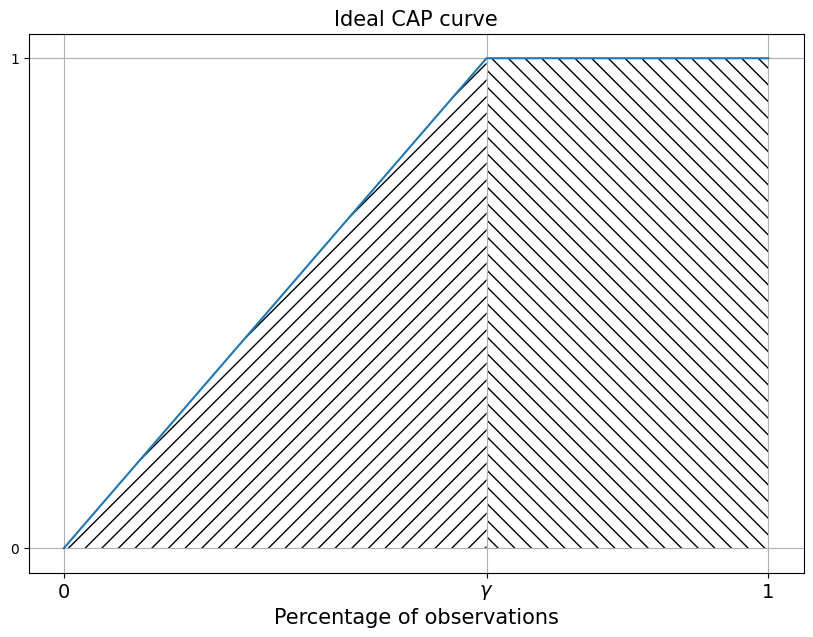

In [5]:
y_rel_ideal = [0, 1/3, 2/3, 1, 1, 1]
x_rel = [i/5 for i in range(6)]

plt.figure(figsize = [10, 7])

plt.plot(x_rel, y_rel_ideal)
plt.fill_between(
    [0, 0.6], [0, 1], [0,0],
    alpha = 0, hatch = "//"
)
plt.fill_between(
    [0.6, 1], [0, 0], [1,1],
    alpha = 0, hatch = "\\\\"
)

plt.yticks([0, 1])
plt.xticks(
    [0, 0.6, 1],
    ["0", "$\gamma$", "1"],
    fontsize = 14
)

plt.title(
    "Ideal CAP curve",
    fontsize = 15
)

plt.grid()
plt.xlabel("Percentage of observations", fontsize = 15)
plt.show()

All observations with feature manifestation have greater $p_i$ than without feature manifestation. Therefore, the $CAP$ curve grows until all objects in which the manifestation of the investigated trait is observed are finished. So in finishes it growth in point:

$$\gamma = \frac{\sum_{i=1}^ny_i}{n}.$$

It turns out that this area decomposes into 2 figures:

- A triangle, highlighted by a hatching slanted to the left;
- A rectangle marked by a hatching slanted to the right.

And can be written:

$$AUC^I = \gamma/2 + (1-\gamma) = 1 - \gamma/2.$$

Then the area between the ideal CAP curve and the random CAP curve is:

$$AUC'^I = 1 - \gamma/2 - 0.5=0.5 - \gamma/2.$$


Or by substituting $\gamma$:

$$AUC'^I = 0.5 - \frac{\sum_{i=1}^{n}y_i}{2n}.$$.

### $GINI$

Finally, combine the previous two steps to write $GINI$:

$$GINI=\frac{AUC'_{cap}}{AUC'^I}=\frac{\sum_{i=0}^{n-1}(TPR_{i+1} + TPR_i)/2n - 0.5}{0.5 - \frac{\sum_{j=1}^{n}y_j}{2n}}=$$
$$=\frac{\left[\sum_{i=0}^{n-1}(TPR_{i+1} + TPR_i)-n\right]/2n}{\frac{n - \sum_{j=1}^{n}y_j}{2n}}=\frac{\sum_{i=0}^{n-1}(TPR_{i+1} + TPR_i)-n}{n - \sum_{j=1}^{n}y_j}.$$

Or by omitting conversions:

$$GINI=\frac{\sum_{i=0}^{n-1}(TPR_{i+1} + TPR_i)-n}{n - \sum_{j=1}^{n}y_j}.$$

## $GINI$ & $AUC_{roc}$ relation
<a id="gini_relation_with_roc_header"></a>

All of the above refers to the basic definition of the $GINI$ coefficient. But today in kaggle and in the industry, $GINI$ is more often expressed through $AUC_{roc}$:

$$GINI = 2(AUC_{roc} - 0.5) = 2AUC_{roc} - 1 \tag{3.1}$$

In my practice I encountered a situation when I was counting GINI using the formula familiar today, and my colleagues used a more classical formula, as a result of which there were conflicts in which I was accused of using the wrong formula. Therefore, I will further prove that both approaches to calculating GINI always lead to the same result.

So we need to prove the statement $(3.1)$.

Let us denote at once that $FPR_0=TPR_0=0$ - values that meet the maximum threshold where none of the values can be assigned to a positive class.

**Let's write the area under the ROC of the curve, which will be the exponent $AUC_{roc}$**:

$$AUC_{roc} = \sum_{i=0}^{n-1} (FPR_{i+1} - FPR_i)(TPR_{i+1} + TPR_i)/2.$$

$$ 2\left[\sum_{i=0}^{n-1} (FPR_{i+1} - FPR_i)(TPR_{i+1} + TPR_i)/2\right] -1 = 
\frac{\sum_{i=0}^{n-1}(TPR_{i+1} + TPR_i)-n}{n - \sum_{j=1}^{n}y_j} \tag{3.2}.$$

We will work with the left part of the identity:

$$
\left[\sum_{i=0}^{n-1} (FPR_{i+1} - FPR_i)(TPR_{i+1} + TPR_i)\right] -1 \tag{3.3}
$$

Let's discuss the properties of expression:

$$
(FPR_{i+1} - FPR_i)
$$

$FPR$ (the fraction of false positive predictions) increases only for predictions without the manifestation of the trait. And, for an observation without the manifestation of the trait, it increases by the fraction that is occupied by one observation without manifestation of the trait:

$$
(FPR_{i+1} - FPR_i)=\begin{cases}
    0, y_i=1;\\
    \frac{1}{n-\sum_j^n y_j}, y_i=0.
\end{cases}
$$

Where $(n-\sum_j^n y_j)$ - number of observations without the trait, тогда $(\frac{1}{n-\sum_j^n y_j})$ - the proportion of one observation in observations with a manifestation of the trait.

Then the expression $(3.3)$ can be rewritten as follows:

$$
\left[\sum_{i|y_{i+1}=0} \frac{1}{n-\sum_{j=1}^n y_j}(TPR_{i+1} + TPR_i)\right] -1
\tag{3.4}
$$

*That is, summation can be performed only for terms for which $y_{i+1}=0$, all other terms will be zero. Moreover, in non-zero terms one of the multipliers is a constant with respect to the summation operator.*

Let us return to expression $(3.2)$ and put the results $(3.4)$ into it.

$$
\left[\sum_{i|y_{i+1}=0} \frac{1}{n-\sum_{j=1}^n y_j}(TPR_{i+1} + TPR_i)\right] -1 = \frac{\sum_{i=0}^{n-1}(TPR_{i+1} + TPR_i)-n}{n - \sum_{j=1}^{n}y_j}
\Leftrightarrow
$$

$$
\Leftrightarrow
\left[\sum_{i|y_{i+1}=0} \frac{1}{n-\sum_{j=1}^n y_j}(TPR_{i+1} + TPR_i)\right] -1 =
\left[\sum^{n-1}_{i=0} 
\frac{1}{n - \sum_{j=1}^{n}y_j}(TPR_{i+1}+TPR_i)
\right] - \frac{n}{n - \sum_{j=1}^{n}y_j}
\Leftrightarrow
$$

$$
\Leftrightarrow
\left[\sum^{n-1}_{i=0} 
    \frac{1}{n - \sum_{j=1}^{n}y_j}(TPR_{i+1}+TPR_i)
    \right] - 
    \left[\sum_{i|y_{i+1}=0} \frac{1}{n-\sum_{j=1}^n y_j}(TPR_{i+1} + TPR_i)\right] -
    \frac{n}{n - \sum_{j=1}^{n}y_j} + 1
= 0
$$

Pay attention to the expressions in square brackets - they completely coincide, only the number of summation components differs, i.e. after the subtraction only those components that are not in the subtractor will remain:


$$
\left[
    \sum_{i|y_{i+1}=1} \frac{1}{n-\sum_{j=1}^n y_j}(TPR_{i+1} + TPR_i)
\right] -
    \frac{n}{n - \sum_{j=1}^{n}y_j} + 1
= 0
\tag{3.5}$$

**Let us discuss the interim results**. We have shown that expression $(3.2)$ which we need to prove is equivalent to expression $(3.5)$, so by proving expression $(3.5)$ we arrive at the truth of expression $(3.2)$.

Let us perform a number of transformations on the expression $(3.5)$.

$$
\left[
    \sum_{i|y_{i+1}=1} \frac{1}{n-\sum_{i=1}^n y_i}(TPR_{i+1} + TPR_i)
\right] -
    \frac{n}{n - \sum_{i=1}^{n}y_i} + 1
= 0 \Leftrightarrow
$$

$$
\Leftrightarrow
\left[
    \sum_{i|y_{i+1}=1} \frac{1}{n-\sum_{i=1}^n y_i}(TPR_{i+1} + TPR_i)
\right] -
    \frac{\sum_{i=1}^{n}y_i}{n - \sum_{i=1}^{n}y_i}
= 0
\Leftrightarrow
$$

$$
\Leftrightarrow
\frac{1}{n-\sum_{i=1}^n y_i}
\left\{
    \left[
        \sum_{i|y_{i+1}=1} (TPR_{i+1} + TPR_i)
    \right] -
       \sum_{i=1}^{n}y_i
\right\}
= 0
$$

Given that the expression $\frac{1}{n-\sum_{i=1}^n y_i}$ is non-negative. To fulfil the last identity it is necessary that:

$$
\left[
    \sum_{i|y_{i+1}=1} (TPR_{i+1} + TPR_i)
\right] -
   \sum_{i=1}^{n}y_i
=0 \tag{3.6}$$

Consider the sum in square brackets:

$$\sum_{i|y_{i+1}=1} (TPR_{i+1} + TPR_i)$$

Let's rewrite it in a simpler way, but keeping in mind that the summation is carried out only on observations with the manifestation of the trait:

$$\sum_{i=0}^{m-1} (TPR_{i+1} + TPR_i)$$

Where 
$$m=\sum_{i=1}^{n}y_i \tag{3.7}$$

Now recall that $TPR$ is the proportion of customers, with manifestation, of the trait for whom the manifestation of the trait was predicted. And it can be written as:

$$TPR_i=\frac{i}{m} \tag{3.8}$$

Returning to the identity $(3.6)$ and using the results $(3.7)$ and $(3.8)$ we obtain:

$$
\left[
\sum_{i=0}^{m-1} \left(\frac{i+1}{m} + \frac{i}{m}\right)
\right]
-m=0
\Leftrightarrow
\sum_{i=0}^{m-1} \left(\frac{2i+1}{m}\right)=m
$$

Finally:

$$
\sum_{i=0}^{m-1} 2i+1 = m^2
$$

By proving this identity we prove that the whole chain of identities above is fulfilled. There is already a very similar proof presented <a href="https://math.stackexchange.com/questions/2507815/finding-the-formula-for-the-summation-sum-i-1n-2i-1-135-2n-1?newreg=662a6da934824f24ad28bdbb360d918d">here</a>. Let us give a similar proof for our example.

Let's spell out the expression on the left:

$$\sum_{i=0}^{m-1} 2i+1 = 1 + 3 + 5 + ... + 2(m-1)+1.$$

There are not enough even numbers in the summation add and subtract them:

$$\sum_{i=0}^{m-1} 2i+1 = \{1 + 3 + 5 + ... + [2(m-1)+1]\} + \{2 + 4 + 6 + ... + 2(m-1)\} - \{2 + 4 + 6 + ... + 2(m-1)\}.$$

We combine and conjugate the components of the first and second curly brackets and take 2 out of the second brackets:

$$\sum_{i=0}^{m-1} 2i+1 = \{1 + 2 + 3 + 4 + ... + 2(m-1) + [2(m-1)+1]\} - 2\{1 + 2 + 3 + ... + (m-1)\}.$$

Returning to the summation operator we obtain:

$$\sum_{i=0}^{m-1} 2i+1 = \left[\sum_{i=1}^{2(m-1)+1}i\right] - 2\left[\sum_{i=1}^{m-1}i\right]. \tag{3.9}$$

In the resulting expression, an expression of the form occurs twice:

$$\sum_{i=1}^\nu i.$$

<a href="https://r-knott.surrey.ac.uk/runsums/triNbproof.html">Here</a> you can find that:

$$2\sum_{i=1}^\nu i = \sum_{i=1}^\nu i + \sum_{i=1}^\nu i = [1 + 2 + ... + (\nu-1) + \nu] + [\nu + (\nu-1) + ... + 2 + 1]=$$<br>
$$=(\nu+1) + (\nu-1+2) + ... + (2 + \nu - 1) + (\nu+1)=$$<br>
$$=(\nu+1) + (\nu+1) + ... + (\nu+1)=$$<br>
$$=\sum_{i=1}^{\nu} (\nu+1) = \nu(\nu+1)$$

So:

$$2\sum_{i=1}^\nu i = \nu(\nu+1) \Leftrightarrow \sum_{i=1}^\nu i = \frac{\nu(\nu +1)}{2}$$

Using the last results in $(3.9)$:
$$
\sum_{i=0}^{m-1} 2i+1 =
$$
$$
=\frac{[2(m-1)+1]([2(m-1)+1] + 1)}{2} - 2\frac{[m-1]([m-1]+1)}{2}=.
$$
$$
=\frac{2m[2m+1]}{2} - [m-1]([m-1]+1)=
$$
$$
=m[2m+1] - m[m-1] =
$$
$$
= 2m^2+m-m^2-m=
$$
$$
= m^2
$$


Finally:

$$\sum_{i=0}^{m-1} 2i+1 = m^2$$

Thus the identity $(3.6)$ is fulfilled, followed by the correctness of the identity $(3.5)$ and followed by the correctness of the identity $(3.1)$ $\boxtimes$.